In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from textblob import TextBlob
%matplotlib inline

Load the natural question dataset in squad format

In [2]:
with open("/Users/christoskallaras/code/personal/claimer-detection/data/natural_question/nq_to_squadtrain.json", "r") as f:
    data = json.load(f)

Alter the format of the file to more readable form and load it to a pandas dataframe

In [6]:
processed_data = []
for entry in data["data"]:
    title = entry["title"]
    for paragraph in entry["paragraphs"]:
        context = paragraph["context"]
        for qa in paragraph["qas"]:
            question = qa["question"]
            answer = qa["answers"][0]["text"] if qa["answers"] else None
            processed_data.append({"title": title, "context": context, "question": question, "answer": answer})
df = pd.DataFrame(processed_data)
df.head(25)

,title,context,question,answer
0,Persephone,"In Greek mythology, Persephone (/pərˈsɛfəni/; ...",in greek mythology who was the goddess of spri...,"Persephone (/pərˈsɛfəni/; Greek: Περσεφόνη), a..."
1,Judaism,"Halakha, the rabbinic Jewish way of life, then...",what is the name of the most important jewish ...,the Shulchan Aruch
2,Football in Spain,In a survey of sports habits of the Spanish po...,what is the name of spain's most famous soccer...,Real Madrid
3,Robot-assisted surgery,The first robot to assist in surgery was the A...,when was the first robot used in surgery,1983
4,I Love It (Icona Pop song),The song's lyrics describe breaking up with an...,who sings the song i don't care i love it,Icona Pop and Charli XCX
5,Zimbabwe,"Zimbabwe (/zɪmˈbɑːbweɪ/), officially the Repub...",where is zimbabwe located in the world map,"in southern Africa, between the Zambezi and Li..."
6,Hectare,"The hectare (/ˈhɛktɛər, -tɑːr/; SI symbol: ha)...",100 acres is equal to how many hectares,1 square hectometre (hm)
7,Donovan Mitchell,Mitchell was drafted by the Denver Nuggets wit...,where was donovan mitchell picked in the draft,13th
8,The Beatles' rooftop concert,The Beatles' rooftop concert was the final pub...,where did the beatles final live performance t...,the roof of the headquarters of the band's mul...
9,Luis Guillermo Solís,Luis Guillermo Solís Rivera (born 25 April 195...,who is the president of costa rica 2017,Luis Guillermo Solís Rivera


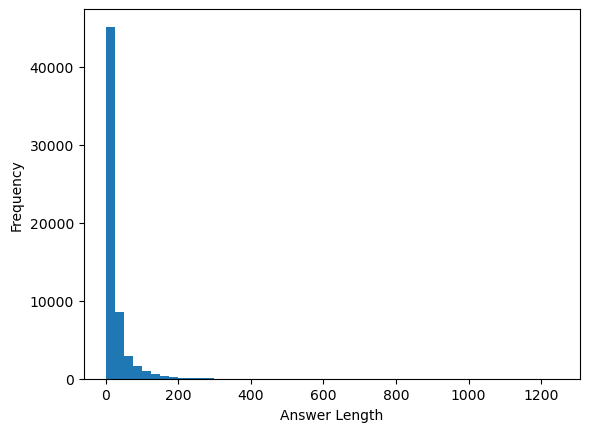

In [7]:
# Plot the distribution of answer lengths
df['answer_length'] = df['answer'].apply(len)
df['answer_length'].plot.hist(bins=50)
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.show()

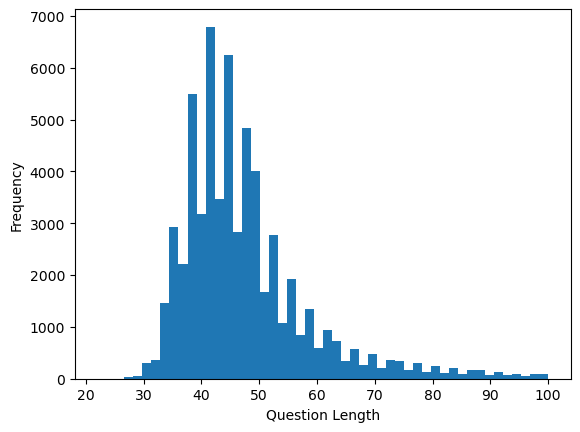

In [8]:
# Plot the distribution of question lengths
df['question_length'] = df['question'].apply(len)
df['question_length'].plot.hist(bins=50)
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

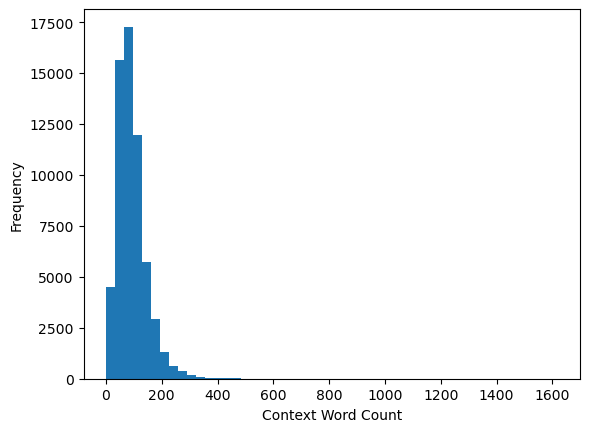

In [9]:
# Plot the distribution of the number of words in the context
df['context_word_count'] = df['context'].apply(lambda x: len(x.split()))
df['context_word_count'].plot.hist(bins=50)
plt.xlabel('Context Word Count')
plt.ylabel('Frequency')
plt.show()


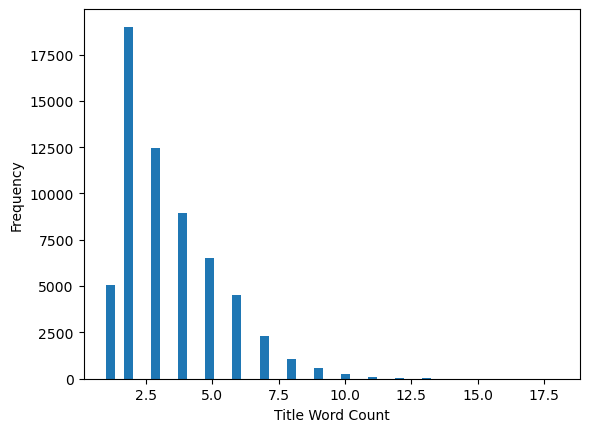

In [10]:
# Plot the distribution of the number of words in the title
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
df['title_word_count'].plot.hist(bins=50)
plt.xlabel('Title Word Count')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Wordclouds
from wordcloud import WordCloud
from gensim.parsing.preprocessing import STOPWORDS

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(text)
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
    plt.show()

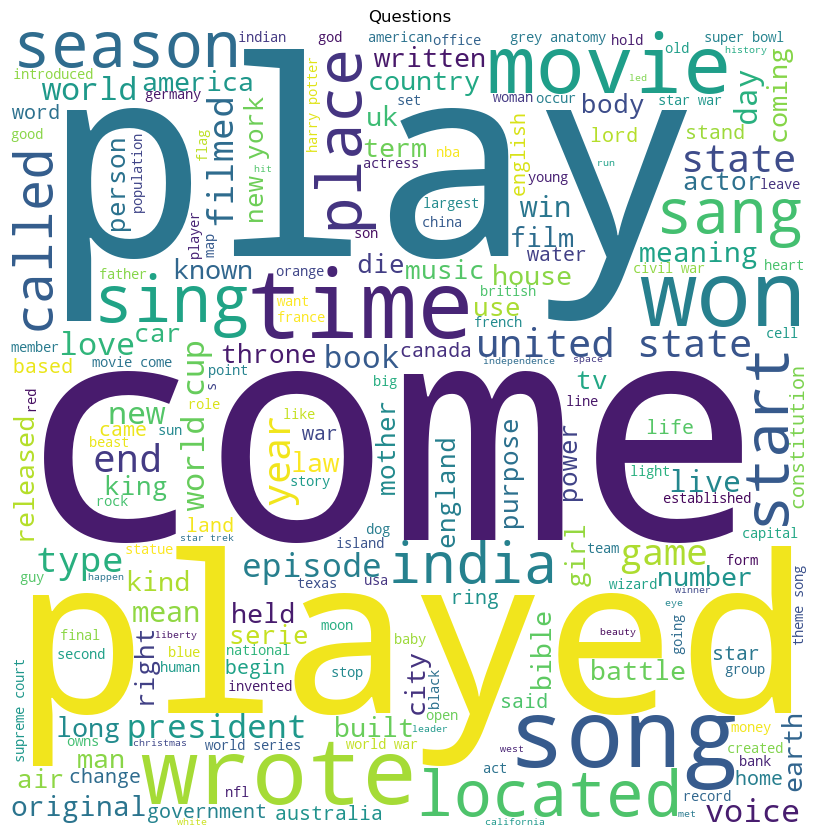

In [16]:
# Plot wordclouds for questions, answers, contexts, and titles
questions = " ".join(df['question'].tolist())
plot_wordcloud(questions, "Questions")

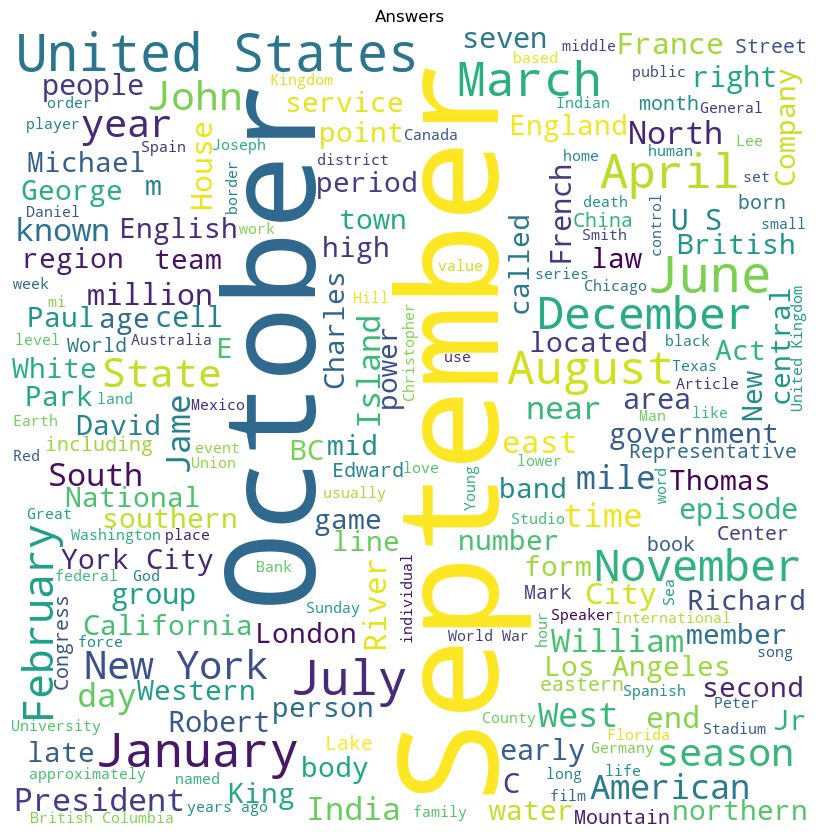

In [17]:
answers = " ".join(df['answer'].tolist())
plot_wordcloud(answers, "Answers")

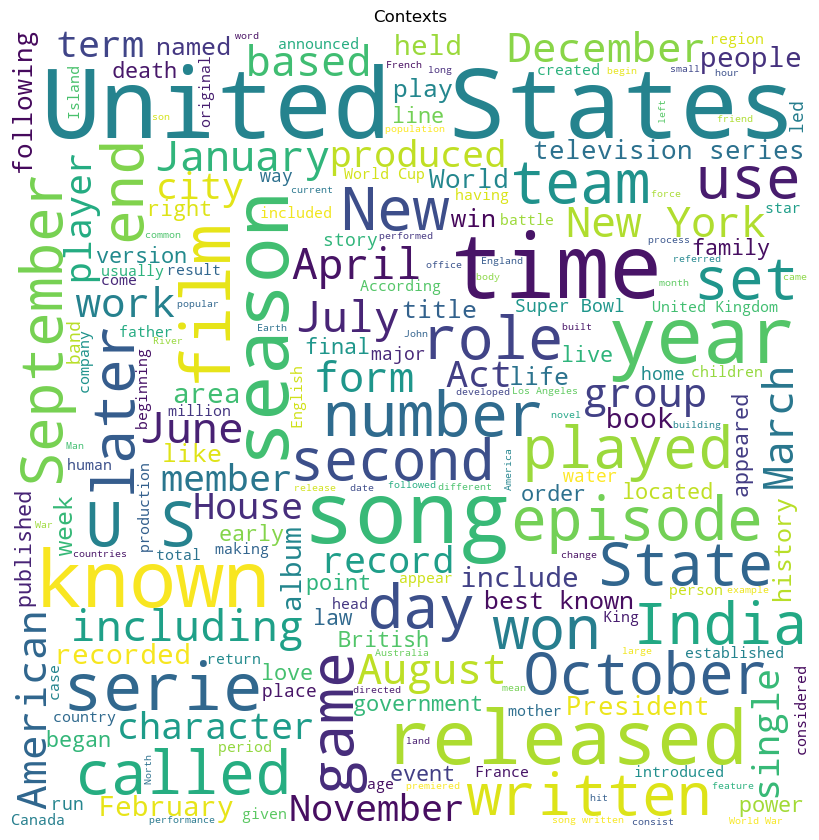

In [18]:
contexts = " ".join(df['context'].tolist())
plot_wordcloud(contexts, "Contexts")

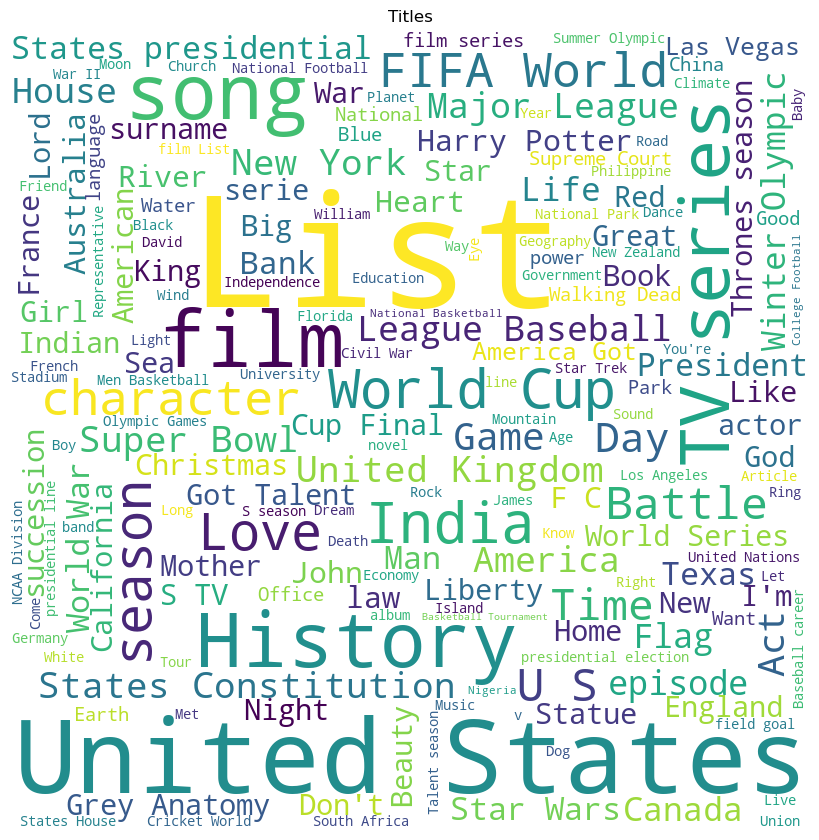

In [19]:
titles = " ".join(df['title'].tolist())
plot_wordcloud(titles, "Titles")

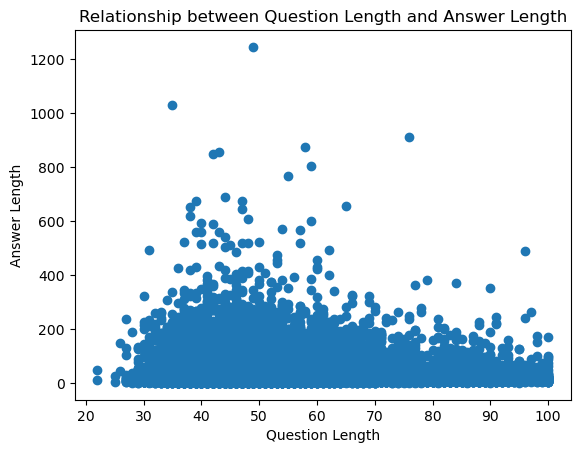

In [21]:
# Scatter plots
# Plot the relationship between the length of the question and the length of the answer
df['question_length'] = df['question'].apply(len)
df['answer_length'] = df['answer'].apply(len)

plt.scatter(df['question_length'], df['answer_length'])
plt.xlabel('Question Length')
plt.ylabel('Answer Length')
plt.title('Relationship between Question Length and Answer Length')
plt.show()

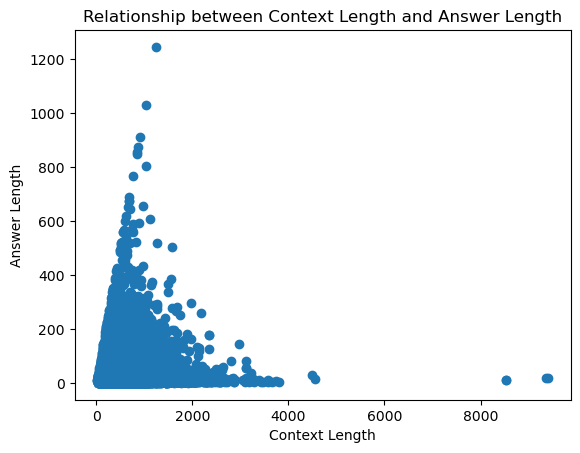

In [22]:
# Heatmaps
# Plot the relationship between the length of the context and the length of the answer
df['context_length'] = df['context'].apply(len)

plt.scatter(df['context_length'], df['answer_length'])
plt.xlabel('Context Length')
plt.ylabel('Answer Length')
plt.title('Relationship between Context Length and Answer Length')
plt.show()

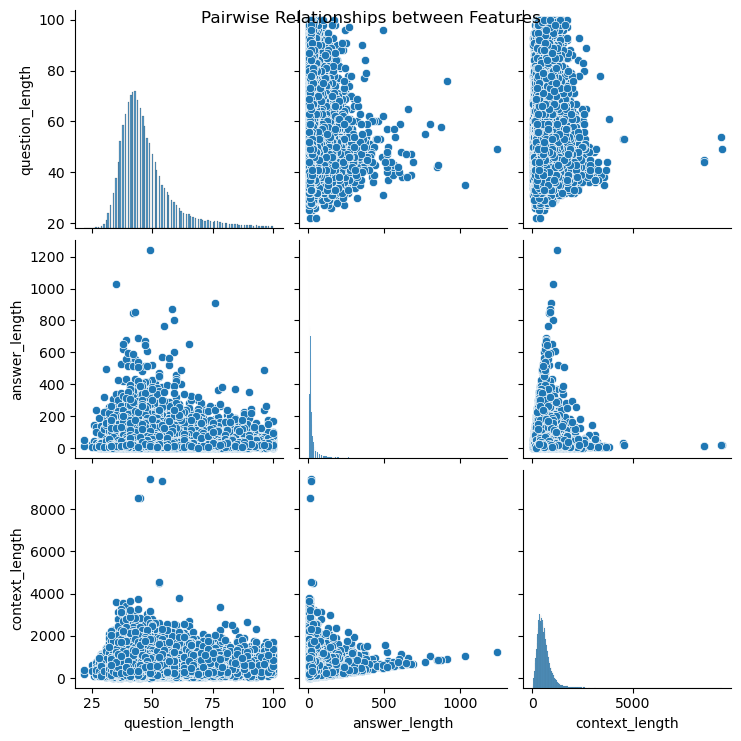

In [27]:
# Pair plots
# Plot the relationship between different features in the dataset
sns.pairplot(df[['question_length', 'answer_length', 'context_length']])
plt.suptitle("Pairwise Relationships between Features")
plt.show()

Extract categories for answers and questions using NER. The code defines a function get_entities to extract entities from a text using the spaCy NER model. I apply this function to both the answers and questions, and count the number of entities in each. Finally, i create histograms and bar plots to show the distribution of entity counts and entity types in the answers and questions.

In [28]:
import spacy
# Load the spaCy NER model
nlp = spacy.load("en_core_web_sm")

In [29]:
# Function to extract entities from a text
def get_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append(ent.label_)
    return entities

# Apply the function to extract entities from the answers
df['answer_entities'] = df['answer'].apply(get_entities)

# Apply the function to extract entities from the questions
df['question_entities'] = df['question'].apply(get_entities)

# Count the number of entities in each answer
df['answer_entity_count'] = df['answer_entities'].apply(len)

# Count the number of entities in each question
df['question_entity_count'] = df['question_entities'].apply(len)

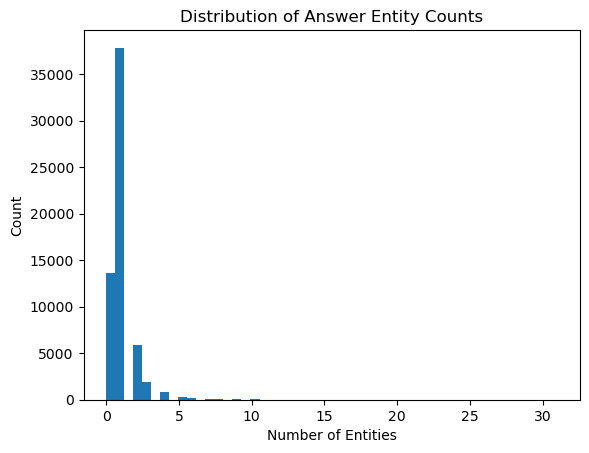

In [30]:
# Plot the distribution of answer entity counts
plt.hist(df['answer_entity_count'], bins=50)
plt.xlabel('Number of Entities')
plt.ylabel('Count')
plt.title('Distribution of Answer Entity Counts')
plt.show()

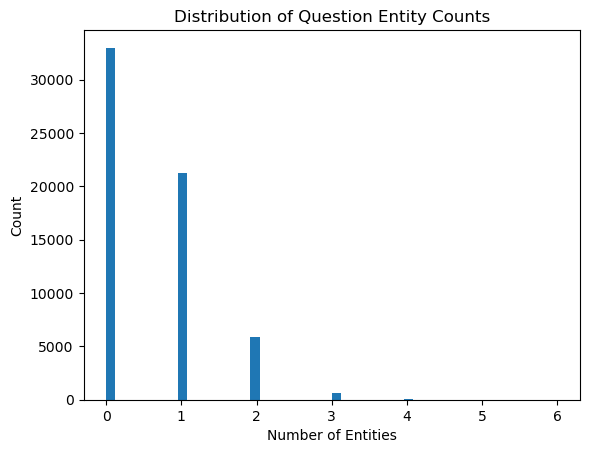

In [31]:
# Plot the distribution of question entity counts
plt.hist(df['question_entity_count'], bins=50)
plt.xlabel('Number of Entities')
plt.ylabel('Count')
plt.title('Distribution of Question Entity Counts')
plt.show()

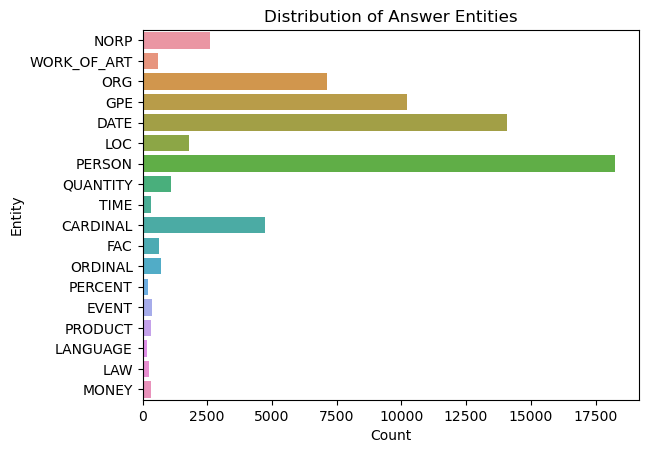

In [32]:
# Plot the distribution of answer entities
sns.countplot(y=df['answer_entities'].explode().reset_index(drop=True))
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Distribution of Answer Entities')
plt.show()

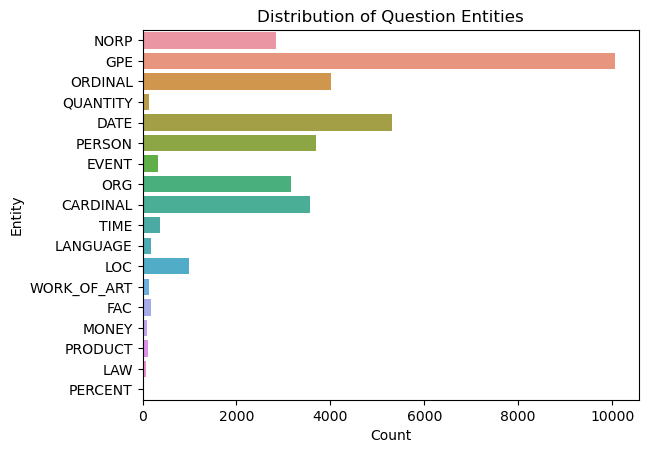

In [33]:
# Plot the distribution of question entities
sns.countplot(y=df['question_entities'].explode().reset_index(drop=True))
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Distribution of Question Entities')
plt.show()

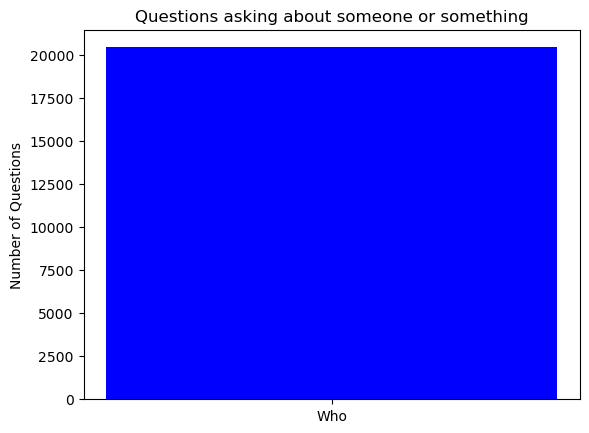

In [34]:
# Count the number of questions asking "Who said something"
count = 0
for question in df["question"]:
    if "Who" in question or "who" in question:
        count += 1

# Plot the number of questions asking "Who said something"
plt.bar(["Who"], [count], color = "blue")

# Add labels and title
plt.ylabel("Number of Questions")
plt.title("Questions asking about someone or something")

# Show the plot
plt.show()